In this module, we study how to implement the tree-based algorithms for classification tasks in Python. We focus on the basic tree method, bagging, random forests, and extra-tree method. 

The dataset we will be using is a small dataset that records kyphosis information (a spinal condition in the medical world). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import graphviz # conda prompt: conda install python-graphviz

from IPython.display import Image  
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import export_graphviz

%matplotlib inline

In [2]:
path='C:\\Users\\pgao\\Documents\\PGZ Documents\\Programming Workshop\\PYTHON\\Open Courses on Python\\Udemy Course on Python\\Introduction to Data Science Using Python\\datasets'
os.chdir(path)
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


Let's do some explorative data analysis now:

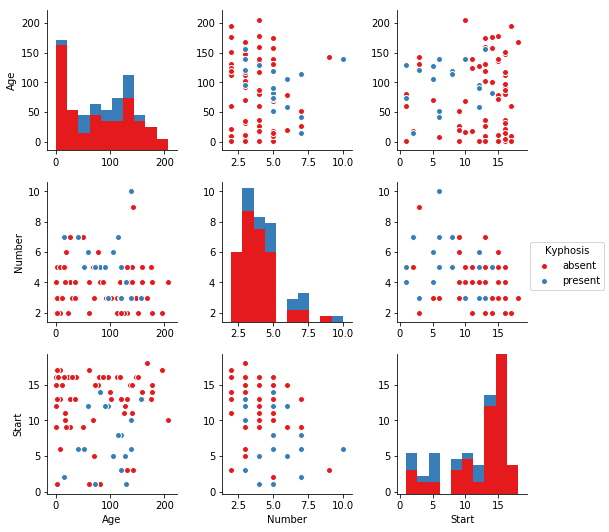

In [3]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

In [4]:
EDA1=df.describe()
EDA2=df.columns
print(EDA1, '\n')
print(EDA2, '\n')
df.info()

              Age     Number      Start
count   81.000000  81.000000  81.000000
mean    83.654321   4.049383  11.493827
std     58.104251   1.619423   4.883962
min      1.000000   2.000000   1.000000
25%     26.000000   3.000000   9.000000
50%     87.000000   4.000000  13.000000
75%    130.000000   5.000000  16.000000
max    206.000000  10.000000  18.000000 

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


Now let's examine missing data. We know that tree-based methods can generally handle missing data very well, but it's still important to have an estimate about how many data points are missing in the entire dataset. If the picture below has missing data, we will see a solid rectangle:

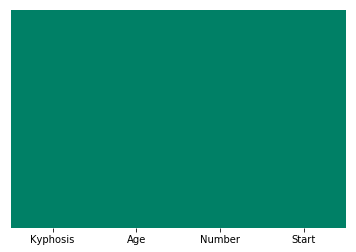

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='summer')

Now let's do the training-test split:

In [6]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

We now perform our analysis in the following manner: 1) off-the-shelves classification tree, 2) extra tree (extremely randomized tree), 3) bagged tree and 4) random forests. 

First, we use the off-the-shelves classification tree. The default impurity function is given by the Gini index. The 'scikit-learn' package uses an optimized version of the CART algorithm.

In [7]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     absent       0.78      0.95      0.86        19
    present       0.50      0.17      0.25         6

avg / total       0.71      0.76      0.71        25



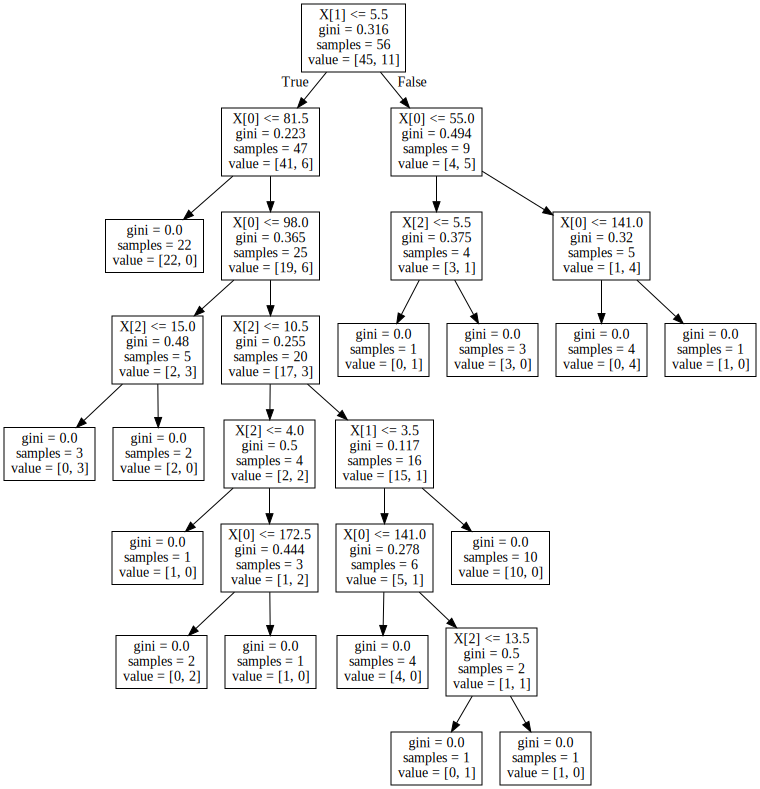

In [8]:
dot_data = export_graphviz(dtree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

Next let's examine the extremely randomized tree method. This algorithm implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. Some of the arguments for the ExtraTreesClassifier() method include the following: 

  1. n_estimators: integer, optional (default=10)
  2. criterion: string, optional (default='gini', and the alternative includes 'entropy', both of which measures the impurity functions
  3. max_features: int, float, string or None, optional (default='auto')
  
The maximum feature determines the number of features to consider when looking for the best split. Having a value of 'int' considers 'max_features' features at each split. Having a value of 'float' implies that 'max_features' is a percentage and int(max_features * n_features) features are considered at each split. If 'auto', then max_features=sqrt(n_features). If 'log2', then max_features=log2(n_features). If None value is supported, then max_features=n_features (here n_feature denotes the number of total features in the model). 

There are many other optional arguments for this method which can be found in the online documentation. 

Now let's apply this method to the same dataset and compare:

In [9]:
extratree = ExtraTreesClassifier()
extratree.fit(X_train,y_train)
predictions = extratree.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     absent       0.79      1.00      0.88        19
    present       1.00      0.17      0.29         6

avg / total       0.84      0.80      0.74        25



If you would like to see how each tree is performed, you can do the following:

In [10]:
extratree.estimators_

[ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=1666104221,
           splitter='random'),
 ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=205006053,
           splitter='random'),
 ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=631527514,
           split

The extra tree method is hard to visualize given the random nature of the algorithm (because there are more than one trees). However, practioners often use this method to rank variable importance. 

The features to be scored include the following in order:  ['Age', 'Number', 'Start'] 

Age : 0.361451460348
Number : 0.325693315142
Start : 0.31285522451

 Feature ranking:
1. feature 0 (0.361451)
2. feature 1 (0.325693)
3. feature 2 (0.312855)


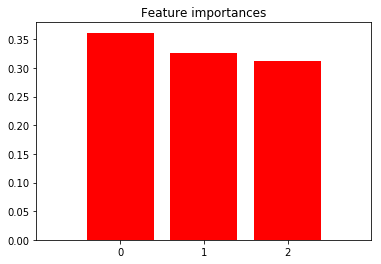

In [11]:
Xcolumn_names=list(X_train)
importances = extratree.feature_importances_
feature_report = dict(zip(Xcolumn_names, importances))
print('The features to be scored include the following in order: ', Xcolumn_names, '\n')
for j in feature_report:
    print (j,':',feature_report[j])    
    
std = np.std([extratree.feature_importances_ for tree in extratree.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
print("\n Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

The third algorithm we will go over is the tree-bagging algorithm for classification. The main function we will be using is BaggingClassifier(). Bagging originally denotes bootstrap aggregating. Here, the BaggingClassifier() is actually a more general classifier than the originally proposed tree-bagging classification algorithm. In Python specifically, BaggingClassifier() can be encapsulated as an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

This BaggingClassifier() algorithm in Python encompasses several works from the literature. When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as 'Pasting'. If samples are drawn with replacement (through bootstrap), then the method is known as 'Bagging' (this is the original bagging). When random subsets of the dataset are drawn as random subsets of the features, then the method is known as 'Random Subspaces'. Finally, when base estimators are built on subsets of both samples and features, then the method is known as 'Random Patches'. The online documentation provides all the details of these algorithms and their sources from academic papers. Basically, the key here is that BaggingClassifier() not only includes the tree-bagging algorithm proposed by Breiman (1996) in his paper 'Bagging Predictors'. 

The BaggingClassifier() function provides a set of arguments. Here are some highlights:

  1. base_estimator: object or None, optional (default=None)
  2. n_estimators: int, optional (default=10)
  3. max_samples: int or float, optional (default=1.0)
  4. bootstrap: (default=True)
  5. bootstrap_features: (default=False)

For (1), the base estimator to fit on random subsets of the dataset. If the value is set 'None', then the base estimator is a decision tree. For (2), the n_estimators is the number of base estimators in the ensemble. For (3), max_samples is the number of samples to draw from X to train each base estimator. In particular:

  1. If 'int', then draw max_samples samples.
  2. If 'float', then draw max_samples * X.shape[0] samples.
  
For (5), the argument controls whether features are drawn with replacement. Again, there are many more arguments not discussed but can be found from the online documentation. 

There are also many methods associated with this algorithm. For example, score(X, y, sample_weight=None) returns the average accuracy on the given dataset and labels. For another example, predict_proba(X) can also predict class probabilities for X. The predicted class probabilities of an input sample is computed as the mean predicted class probabilities of the base estimators in the ensemble. If base estimators do not implement a predict_proba() method, then it resorts to voting and the predicted class probabilities of an input sample represents the proportion of estimators predicting each class.

Below, let's create an example of using BaggingClassifier() with 100 trees and CART as the base estimator:

In [12]:
CART = DecisionTreeClassifier()
seed=10023
num_trees = 100
btree = BaggingClassifier(base_estimator=CART, n_estimators=num_trees, random_state=seed)
btree.fit(X_train,y_train)
predictions = btree.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     absent       0.79      1.00      0.88        19
    present       1.00      0.17      0.29         6

avg / total       0.84      0.80      0.74        25



The BaggingClassifier() does not have the feature importance mechanism to help us select variables. 

Lastly, let's go over random forests. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

The syntax for RandomForestClassifier() is extremely similar to the previous three algorithms so we will not elaborate here, and any confusions can be cleared by referencing the online documentation. The nice thing about this function is that it has the attribute 'feature_importances_'.

In [13]:
rftree = RandomForestClassifier()
rftree.fit(X_train,y_train)
predictions = rftree.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     absent       0.79      1.00      0.88        19
    present       1.00      0.17      0.29         6

avg / total       0.84      0.80      0.74        25



The features to be scored include the following in order:  ['Age', 'Number', 'Start'] 

Age : 0.245541175293
Number : 0.312572752207
Start : 0.4418860725

 Feature ranking:
1. feature 2 (0.441886)
2. feature 1 (0.312573)
3. feature 0 (0.245541)


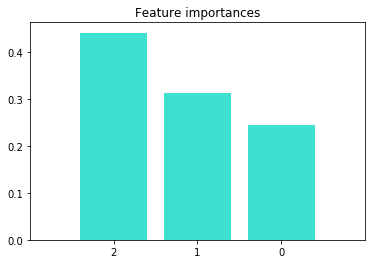

In [14]:
Xcolumn_names=list(X_train)
importances = rftree.feature_importances_
feature_report = dict(zip(Xcolumn_names, importances))
print('The features to be scored include the following in order: ', Xcolumn_names, '\n')
for j in feature_report:
    print (j,':',feature_report[j])    
    
std = np.std([rftree.feature_importances_ for tree in rftree.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
print("\n Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="turquoise", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Additional resources:
  - https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/
  - https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html
  - https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/
  - http://scikit-learn.org/stable/modules/tree.html
  - http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
  - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html
  - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
  - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 